# Introduction
Use Case: Understanding Public Sentiment on a New COVID-19 Strain

As a Data Scientist for the Ministry of Health and Family Welfare, you're tasked with helping the government assess public sentiment in response to the emergence of a new strain of COVID-19.

Whenever a new strain is detected, public reactions can be immediate and intense—ranging from concern to panic. This often leads to behaviors such as stockpiling essential goods, creating supply chain disruptions and widespread anxiety. To proactively manage such situations, the government must gauge public mood quickly and accurately.

While traditional methods like surveys are time-consuming, social media platforms, particularly Twitter, offer real-time insight into public opinion. Given the text-heavy nature of tweets, Natural Language Processing (NLP) techniques can be employed to perform Sentiment Analysis—a process of classifying text as expressing positive, negative, or neutral sentiment.

This project demonstrates how Twitter data can be leveraged to analyze public sentiment, enabling authorities to respond faster and more effectively in times of public health uncertainty.

# Installation NLTK library

In [1]:
!pip install --user -U nltk

# Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf 
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px
import random

# SetUp NLTK
import nltk
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Downloading dataset

In [3]:
#corona tweets datset

!gdown 11LWo5nagSmC72hOJM9lm2l05sdQxt4rf

Downloading...
From: https://drive.google.com/uc?id=11LWo5nagSmC72hOJM9lm2l05sdQxt4rf
To: /kaggle/working/corona_tweets.csv
100%|███████████████████████████████████████| 1.00M/1.00M [00:00<00:00, 113MB/s]


In [4]:
dataframe = pd.read_csv("./corona_tweets.csv")
dataframe.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# Exploratory Data Analysis

In [7]:
dataframe.shape

(3798, 6)

In [6]:
fig = px.pie(dataframe, names='Sentiment',hole=0.3, title='Sentiment Pie Chart')
fig.show()

In [8]:
dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].shape

(1041,)

In [9]:
dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].shape

(947,)

# Splitting the dataset into training and testing

In [10]:
# Separating positive_tweets and negative_tweets
all_positive_tweets = list(dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].astype(str)) # Making equal positive and negative tweet counts
all_negative_tweets = list(dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))[:947]

# Splitting training and testing set. 80/20 split
positive_train, positive_test = train_test_split(all_positive_tweets, test_size=0.2, random_state=42)
negative_train, negative_test = train_test_split(all_negative_tweets, test_size=0.2, random_state=42)

In [11]:
print("Size of training dataset: ",len(positive_train) + len(negative_train))
print("Size of testing dataset: ", len(positive_test)  + len(negative_test))

Size of training dataset:  1514
Size of testing dataset:  380


In [14]:
# print positive in green
print('\033[92m' + '\npositive in green: ')
print('\033[92m' + all_positive_tweets[random.randint(0,947)])
print('\033[91m' + '\nnegative in red: ')
# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,947)])


positive in green: 
Walking through my supermarket in this time of covid -19.  I have discovered that people dont like okra. Who knew.

negative in red: 
If necessary stock up on things like hand cleanser food and cleaning supplies but don t worry about face masks or bottles


# Tokenization

In [19]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.stem import WordNetLemmatizer    # module for Lemmatization

from nltk.tokenize import TweetTokenizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [20]:
# Removing hyperlinks and hashtags

print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT

Consumers have increased their online shopping due to coronavirus.  retail ecommerce study coronavirus 


In [23]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Processing Tweets

In [22]:
def process_tweet(tweet):
    lemmatizer = WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            lemma_word = lemmatizer.lemmatize(word)  # stemming word
            tweets_clean.append(lemma_word)

    return tweets_clean

# Build Frequency Dictionary:

In [25]:
def build_freqs(tweets, ys):
    """
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
        freqs: a dictionary mapping each (word, sentiment) pair (=key) to its frequency (=value)
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [26]:
training_tweets = positive_train + negative_train
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(positive_train))), np.zeros((len(negative_train))))

In [27]:
# create frequency dictionary
freqs = build_freqs(training_tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 7964


In [28]:
# select some words to appear in the report.
keys = ['void', 'commun', 'spirit', 'stop', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        ':)', ':(', 'song', 'idea', 'power', 'play']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:

    # initialize positive and negative counts
    pos = 0
    neg = 0

    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    # append the word counts to the table
    data.append([word, pos, neg])

data

[['void', 1, 0],
 ['commun', 0, 0],
 ['spirit', 1, 2],
 ['stop', 11, 23],
 ['merri', 0, 0],
 ['nice', 6, 6],
 ['good', 49, 28],
 ['bad', 1, 8],
 ['sad', 0, 5],
 ['mad', 1, 4],
 ['best', 7, 3],
 ['pretti', 0, 0],
 [':)', 1, 1],
 [':(', 3, 0],
 ['song', 2, 0],
 ['idea', 6, 8],
 ['power', 3, 0],
 ['play', 4, 1]]

In [47]:
df = pd.DataFrame(data, columns =['Word', 'pos_log', 'neg_log'])
df['pos_log'] = np.log(df['pos_log']+1)
df['neg_log'] = np.log(df['neg_log']+1)
df

,Word,pos_log,neg_log
0,void,0.693147,0.000000
1,commun,0.000000,0.000000
2,spirit,0.693147,1.098612
3,stop,2.484907,3.178054
4,merri,0.000000,0.000000
5,nice,1.945910,1.945910
6,good,3.912023,3.367296
7,bad,0.693147,2.197225
8,sad,0.000000,1.791759
9,mad,0.693147,1.609438


# Visualizing Positives and Negative Tokens

In [48]:
fig = px.scatter(df, x="pos_log", y="neg_log", hover_data=['Word'])
fig.show()

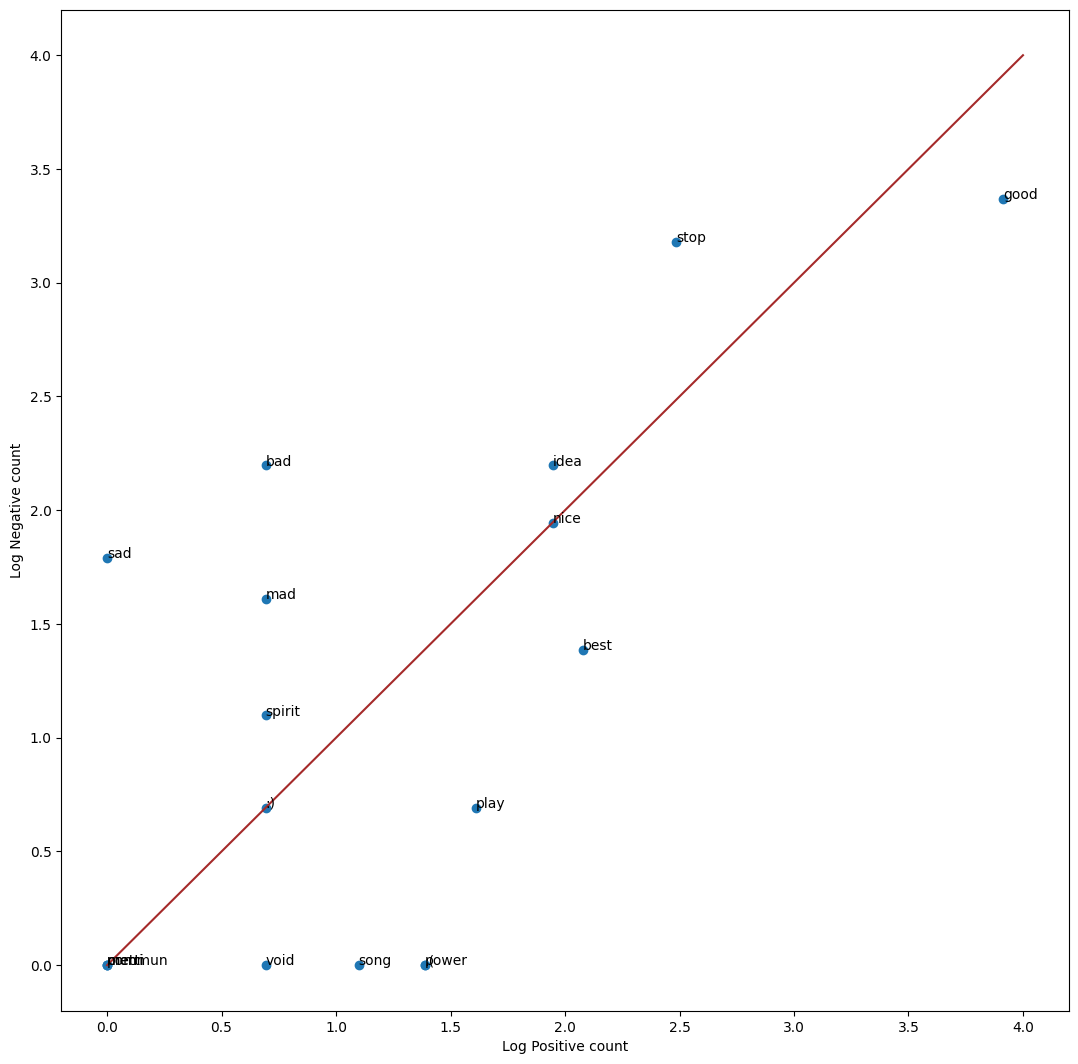

In [49]:
fig, ax = plt.subplots(figsize = (13, 13))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=10)

ax.plot([0, 4], [0, 4], color = 'brown') # Plot the red line that divides the 2 areas.
plt.show()

# Feature Extraction

In [50]:
def extract_features(tweet, freqs):
    '''
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1

    # loop through each word in the list of words
    for word in word_l:

        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)

        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)

    assert(x.shape == (1, 3))
    return x

In [52]:
temp = extract_features('Life is good without covid', freqs)
print(temp)

[[  1. 646. 687.]]


In [53]:
train_x = training_tweets

X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
train_y = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)
Y = np.ravel(train_y,order='C')

In [54]:
clf = LogisticRegression().fit(X, Y)

print("Training Accuracy: ",clf.score(X, Y))

Training Accuracy:  0.6723910171730515


# Logistic Regrerssion

In [55]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C = 0.1,solver= 'saga', penalty= 'l1', max_iter = 500).fit(X, Y)

print("Training Accuracy: ",clf.score(X, Y))

Training Accuracy:  0.6829590488771466


In [56]:
# Testing
testing_tweets = positive_test + negative_test

test_X = np.zeros((len(testing_tweets), 3))
for i in range(len(testing_tweets)):
    test_X[i, :]= extract_features(testing_tweets[i], freqs)

# training labels corresponding to X
test_y = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
test_Y = np.ravel(test_y,order='C')

print("Testing Accuracy: ",clf.score(test_X, test_Y))

Testing Accuracy:  0.5789473684210527


In [76]:
def predict_custom_tweet(tweet, freqs):
    x = extract_features(tweet,freqs)
    y_pred = clf.predict(x)
    return y_pred

In [77]:
# test your function
list_of_tweets = ['\033[92m'+'Thank God coronovirus is over',
                  '\033[91m'+'This is seriously ridiculous. Stop hoarding',
                  '\033[92m'+'Government efforts are great.',
                  '\033[93m'+'Nonsense', #anomaly in classification
                  '\033[91m'+'Panic-buying is pushing up prices.#coronavirus',
                  '\033[92m'+'THANK YOU to make hand sanitizer in distillery amid outbreak']

for tweet in list_of_tweets:
    print( '%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))

Thank God coronovirus is over -> 1.000000
This is seriously ridiculous. Stop hoarding -> 0.000000
Government efforts are great. -> 1.000000
Nonsense -> 0.000000
Panic-buying is pushing up prices.#coronavirus -> 0.000000
THANK YOU to make hand sanitizer in distillery amid outbreak -> 1.000000
